In [113]:
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
load_dotenv()

True

Below is the initial code used as a baseline for the the overall question of the group: "What is driving home prices up?" We got the data from Zillow and used it as a base line for the comparisons we tried to make. I decided to look at education, scholastic aptetude, and the printing of money as factors I thought might be contributing to the rise in real estate prices.

In [2]:
# reading in the hopuse values dataset
house_values_df = pd.read_csv("house_values_zillow.csv")

# filtering down to just the columns we need to run the analysis on
hv_filtered = house_values_df[["RegionName", "StateName", "Metro","2012-01-31","2013-01-31","2014-01-31","2015-01-31","2016-01-31","2017-01-31","2018-01-31","2019-01-31","2020-01-31","2021-01-31","2022-01-31"]] #only the columns I want

# this was the original location of the states list. it was moved higher to be used by the other filters
states = ["GA","CA", "DC", "MI", "FL", "LA", "MD", "OR", "NV"]

# creating a list of cities we will do our research on
cities=["Atlanta","Detroit", "Tampa", "Las Vegas", "Miami", "New Orleans", "Washington", "Baltimore", "Portland", "San Francisco"] 

# a list to filter down to just the metro areas we were interested in
metro = ["Las Vegas-Henderson-Paradise, NV", "San Francisco-Oakland-Berkeley, CA", "Miami-Fort Lauderdale-Pompano Beach, FL", "Portland-Vancouver-Hillsboro, OR-WA", "Washington-Arlington-Alexandria, DC-VA-MD-WV", "Detroit-Warren-Dearborn, MI", "Baltimore-Columbia-Towson, MD", "Atlanta-Sandy Springs-Alpharetta, GA", "Tampa-St. Petersburg-Clearwater, FL", "New Orleans-Metairie, LA"]

# a list to jst give us the years we are interested in researching
years = np.arange(2012,2022,1)

# applying our states filter
filtered_states_df = hv_filtered[hv_filtered.isin(states).any(axis=1)]

# applying our cities filter
filtered_cities_df = filtered_states_df[filtered_states_df.isin(cities).any(axis=1)]

# applying our metro areas filter
filtered_metro_df = filtered_cities_df[filtered_cities_df.isin(metro).any(axis=1)]

# filling any na values with 0 so they wouldnt throw off the data filtering
filtered_metro_df['2012-01-31'] = filtered_metro_df['2012-01-31'].fillna(0)
filtered_metro_df['2013-01-31'] = filtered_metro_df['2013-01-31'].fillna(0)
filtered_metro_df['2014-01-31'] = filtered_metro_df['2014-01-31'].fillna(0)
filtered_metro_df['2015-01-31'] = filtered_metro_df['2015-01-31'].fillna(0)
filtered_metro_df['2016-01-31'] = filtered_metro_df['2016-01-31'].fillna(0)
filtered_metro_df['2017-01-31'] = filtered_metro_df['2017-01-31'].fillna(0)
filtered_metro_df['2018-01-31'] = filtered_metro_df['2018-01-31'].fillna(0)
filtered_metro_df['2019-01-31'] = filtered_metro_df['2019-01-31'].fillna(0)
filtered_metro_df['2020-01-31'] = filtered_metro_df['2020-01-31'].fillna(0)
filtered_metro_df['2021-01-31'] = filtered_metro_df['2021-01-31'].fillna(0)
filtered_metro_df['2022-01-31'] = filtered_metro_df['2022-01-31'].fillna(0)

# Rounding each value so they are easier to read
filtered_metro_df['2012-01-31'] = round(filtered_metro_df['2012-01-31'], 2)
filtered_metro_df['2013-01-31'] = round(filtered_metro_df['2013-01-31'], 2)
filtered_metro_df['2014-01-31'] = round(filtered_metro_df['2014-01-31'], 2)
filtered_metro_df['2015-01-31'] = round(filtered_metro_df['2015-01-31'], 2)
filtered_metro_df['2016-01-31'] = round(filtered_metro_df['2016-01-31'], 2)
filtered_metro_df['2017-01-31'] = round(filtered_metro_df['2017-01-31'], 2)
filtered_metro_df['2018-01-31'] = round(filtered_metro_df['2018-01-31'], 2)
filtered_metro_df['2019-01-31'] = round(filtered_metro_df['2019-01-31'], 2)
filtered_metro_df['2020-01-31'] = round(filtered_metro_df['2020-01-31'], 2)
filtered_metro_df['2021-01-31'] = round(filtered_metro_df['2021-01-31'], 2)
filtered_metro_df['2022-01-31'] = round(filtered_metro_df['2022-01-31'], 2)

# renaming the first column to year for the graphs below
filtered_metro_df = filtered_metro_df.rename(columns={"RegionName":"Year"})

# and easier way to rename the columns in a for lloop so i dont have to write it out 10 times
for i in range(2012,2023):
    filtered_metro_df = filtered_metro_df.rename(columns={f"{i}-01-31":f"{i}"})
    
# setting the index to the renamed Year column
real_estate_prices = filtered_metro_df.set_index("Year")
real_estate_prices.head(20)

C:\Users\matth\AppData\Local\Temp\ipykernel_47568\568779513.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_metro_df['2012-01-31'] = filtered_metro_df['2012-01-31'].fillna(0)
C:\Users\matth\AppData\Local\Temp\ipykernel_47568\568779513.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_metro_df['2013-01-31'] = filtered_metro_df['2013-01-31'].fillna(0)
C:\Users\matth\AppData\Local\Temp\ipykernel_47568\568779513.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,StateName,Metro,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Year,,,,,,,,,,,,,
Las Vegas,NV,"Las Vegas-Henderson-Paradise, NV",116934.02,132081.22,172615.98,186985.34,202048.00,213888.35,247569.68,280512.33,286778.62,305781.91,378531.44
San Francisco,CA,"San Francisco-Oakland-Berkeley, CA",615246.15,738878.23,856989.05,996609.03,1153086.87,1145789.14,1254291.74,1306153.19,1330689.65,1347232.32,1437822.96
Miami,FL,"Miami-Fort Lauderdale-Pompano Beach, FL",176634.14,198546.61,243519.36,270890.51,299043.90,312017.37,324711.58,335967.65,347039.40,369467.39,430181.47
Portland,OR,"Portland-Vancouver-Hillsboro, OR-WA",241196.14,262656.43,294454.36,321556.13,376282.19,422003.08,438346.34,437420.14,445584.98,486544.44,540430.84
Washington,DC,"Washington-Arlington-Alexandria, DC-VA-MD-WV",359139.04,390497.70,438557.80,469496.04,499357.15,518851.06,538924.71,565816.32,577273.60,615740.57,631401.93
Detroit,MI,"Detroit-Warren-Dearborn, MI",18268.31,18558.24,21539.87,24639.40,28344.16,30799.03,35183.51,42025.86,46631.19,57106.31,68524.97
Baltimore,MD,"Baltimore-Columbia-Towson, MD",82727.12,88046.07,100469.70,102555.31,106097.47,110515.43,116700.62,126707.41,137095.08,148247.53,166225.16
Atlanta,GA,"Atlanta-Sandy Springs-Alpharetta, GA",129823.45,137038.97,164578.79,187047.11,212547.31,237702.12,267426.54,297186.94,305776.44,325108.90,367842.69
Tampa,FL,"Tampa-St. Petersburg-Clearwater, FL",94281.68,105523.51,125687.16,139028.21,157266.05,179400.84,198929.01,214526.43,227796.30,255955.56,312954.19


In [3]:
# dropping the columns we dont need anymore
real_estate_prices = real_estate_prices.drop(real_estate_prices.columns[0:2], axis=1)

# using the Transpose command to swap the rows and columns
real_estate_prices = real_estate_prices.transpose()

# converting to a dataframe
real_estate_prices_plot = pd.DataFrame(real_estate_prices)

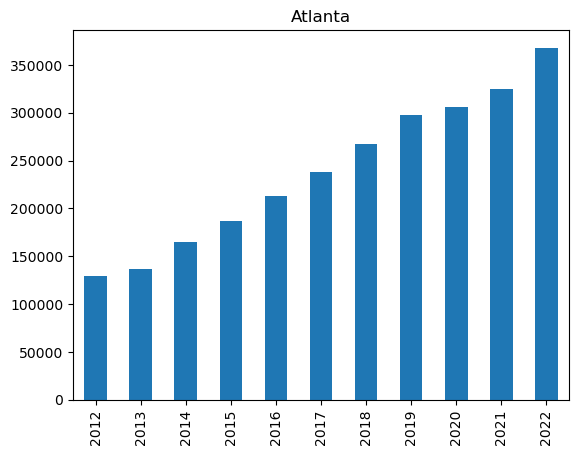

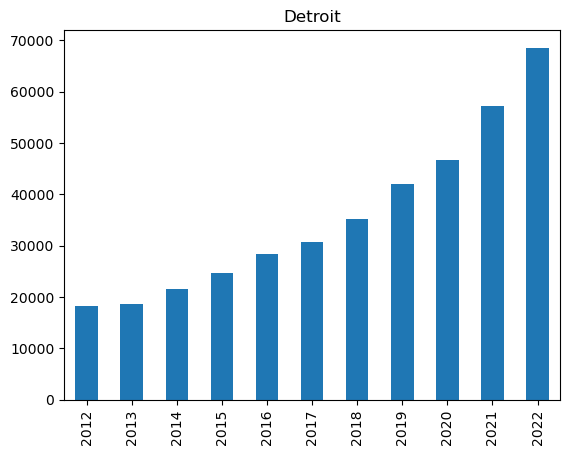

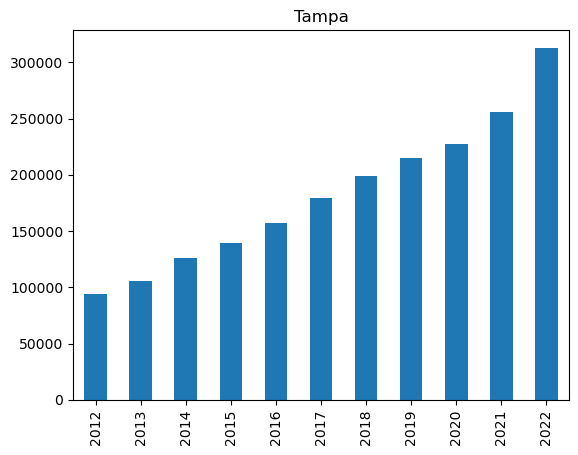

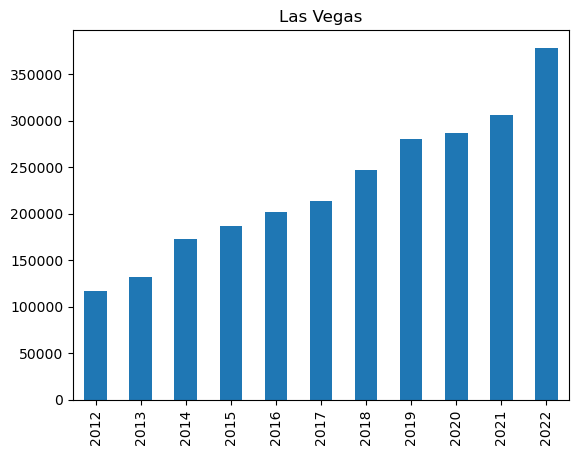

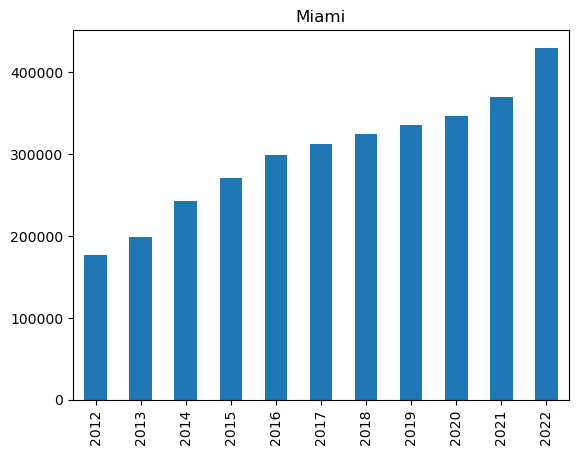

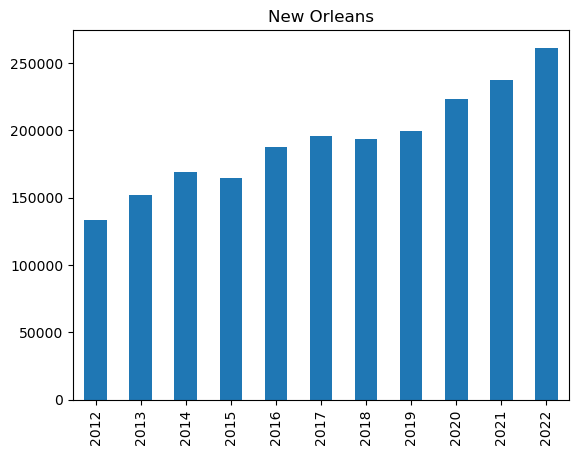

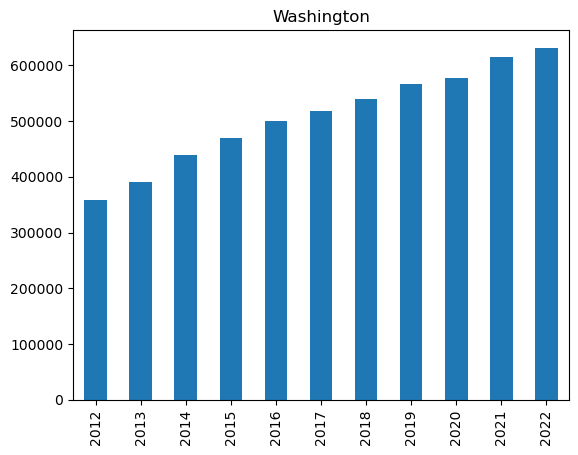

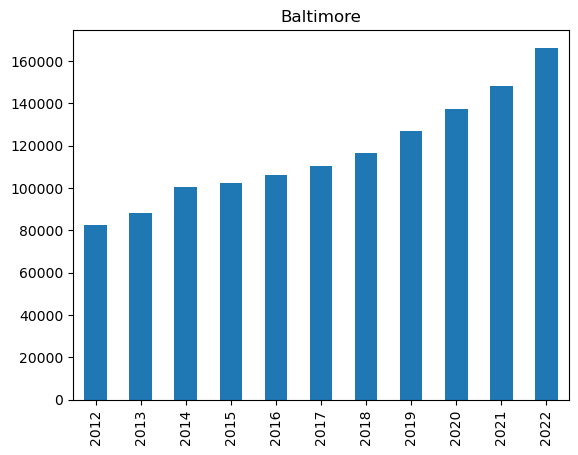

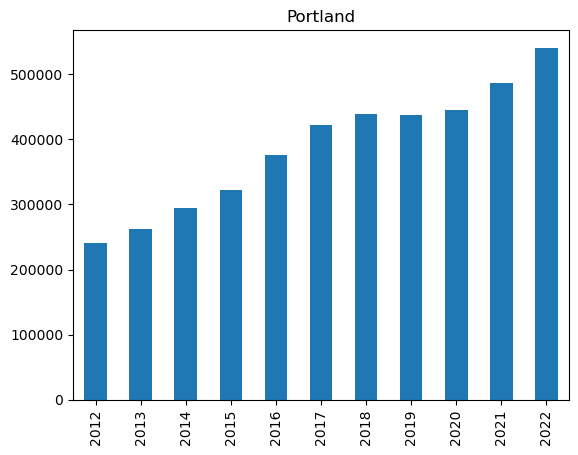

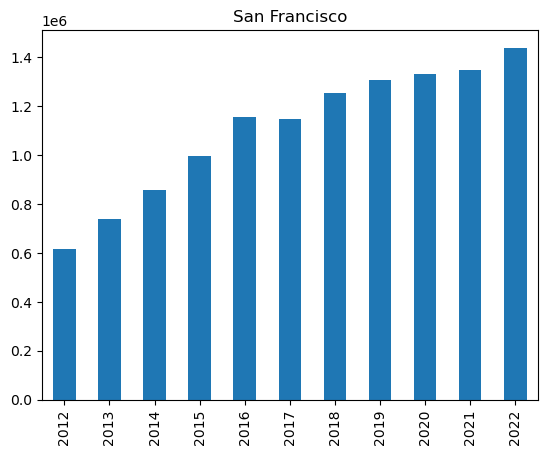

In [4]:
# drops extra washington from "Washington Michigan" from the dataframe
real_estate_prices_plot = real_estate_prices_plot.iloc[:, :-1] 

# this for loop loops through each city and plots a graph for it showing the increase to home values over 10 years
for city in cities:
    current_city = real_estate_prices_plot[[city]].plot(kind="bar", title=city, legend=False)
    plt.show()

As you can see from the first 10 graphs, real estate prices have been going up in not only the top 5 real estate market cities, but the bottom 5 as well. From here I will be looking for other factors to show a steady increase as well to show correlation.

This is the data collected for average college tuition costs. Does the cost of higher education impact home values in their respective cities? To try and see a correlation here I took the sum of all average tuition costs for the colleges in the states we are interested in and graphed based on the change in tuition cost from year to year. I figured that with the cost of tuition going that those graduating would be seeking out better jobs, having more money, and spending that money on real estate.

In [86]:
# reading in the csv for the school year
college_data21_22 = pd.read_csv("../Resources/data/MERGED2021_22_PP.csv", low_memory=False) 

# only the columns I want for average college tuition prices
college21_22 = college_data21_22[["INSTNM","CITY","STABBR","COSTT4_A"]]

# filtering by state first to avoid running into issues with having the same city name in different states
cf_22_df = college21_22[college21_22.isin(states).any(axis=1)]

# filtering by the cities 
cf_22_df = college21_22[college21_22.isin(cities).any(axis=1)]

# removing columns i don't need anymore
no_instnm_df = cf_22_df[["CITY","COSTT4_A"]]

# so i can have the same metric to measure change and not individual tuition prices I mean()ed the costs for each city
by_city_22 = no_instnm_df.groupby(["CITY"]).mean()

# because i want this to be time series i've renamed the avg tuition cost column to year
by_city_22 = by_city_22.rename(columns={"COSTT4_A":"2022"})
by_city_22.head(20)

,2022
CITY,
Atlanta,32261.866667
Baltimore,34374.071429
Detroit,33657.000000
Las Vegas,24221.875000
Miami,26459.000000
New Orleans,35472.000000
Portland,43157.416667
San Francisco,48248.000000
Tampa,27582.142857


In [87]:
# reading in the csv for the school year
college_data20_21 = pd.read_csv("../Resources/data/MERGED2020_21_PP.csv", low_memory=False)

# only the columns I want for average college tuition prices
college20_21 = college_data20_21[["INSTNM","CITY","STABBR","COSTT4_A"]]

# filtering by state first to avoid running into issues with having the same city name in different states
cf_21_df = college20_21[college20_21.isin(states).any(axis=1)]

# filtering by the cities 
cf_21_df = college20_21[college20_21.isin(cities).any(axis=1)]

# removing columns i don't need anymore
no_instnm_df = cf_21_df[["CITY","COSTT4_A"]]

# so i can have the same metric to measure change and not individual tuition prices I mean()ed the costs for each city
by_city_21 = no_instnm_df.groupby(["CITY"]).mean()

# because i want this to be time series i've renamed the avg tuition cost column to year
by_city_21 = by_city_21.rename(columns={"COSTT4_A":"2021"})
by_city_21.head(20)

,2021
CITY,
Atlanta,34084.400000
Baltimore,37262.000000
Detroit,33593.333333
Las Vegas,23449.000000
Miami,27987.461538
New Orleans,34347.750000
Portland,40065.538462
San Francisco,51414.000000
Tampa,26819.666667


In [88]:
# reading in the csv for the school year
college_data19_20 = pd.read_csv("../Resources/data/MERGED2019_20_PP.csv", low_memory=False)

# only the columns I want for average college tuition prices
college19_20 = college_data19_20[["INSTNM","CITY","STABBR","COSTT4_A"]]

# filtering by state first to avoid running into issues with having the same city name in different states
cf_20_df = college19_20[college19_20.isin(states).any(axis=1)]

# filtering by the cities 
cf_20_df = college19_20[college19_20.isin(cities).any(axis=1)]

# removing columns i don't need anymore
no_instnm_df = cf_20_df[["CITY","COSTT4_A"]]

# so i can have the same metric to measure change and not individual tuition prices I mean()ed the costs for each city
by_city_20 = no_instnm_df.groupby(["CITY"]).mean()

# because i want this to be time series i've renamed the avg tuition cost column to year
by_city_20 = by_city_20.rename(columns={"COSTT4_A":"2020"})
by_city_20.head(20)

,2020
CITY,
Atlanta,33110.500000
Baltimore,35990.142857
Detroit,32676.800000
Las Vegas,22756.428571
Miami,24649.071429
New Orleans,33256.750000
Portland,41699.500000
San Francisco,49488.000000
Tampa,24999.166667


In [89]:
# reading in the csv for the school year
college_data18_19 = pd.read_csv("../Resources/data/MERGED2018_19_PP.csv", low_memory=False)

# only the columns I want for average college tuition prices
college18_19 = college_data18_19[["INSTNM","CITY","STABBR","COSTT4_A"]]

# filtering by state first to avoid running into issues with having the same city name in different states
cf_19_df = college18_19[college18_19.isin(states).any(axis=1)]

# filtering by the cities 
cf_19_df = college18_19[college18_19.isin(cities).any(axis=1)]

# removing columns i don't need anymore
no_instnm_df = cf_19_df[["CITY","COSTT4_A"]]

# so i can have the same metric to measure change and not individual tuition prices I mean()ed the costs for each city
by_city_19 = no_instnm_df.groupby(["CITY"]).mean()

# because i want this to be time series i've renamed the avg tuition cost column to year
by_city_19 = by_city_19.rename(columns={"COSTT4_A":"2019"})
by_city_19.head(20)

,2019
CITY,
Atlanta,31050.800000
Baltimore,35009.500000
Detroit,35589.400000
Las Vegas,22721.777778
Miami,25181.230769
New Orleans,31945.875000
Portland,40346.928571
San Francisco,48163.666667
Tampa,24694.166667


In [90]:
# reading in the csv for the school year
college_data17_18 = pd.read_csv("../Resources/data/MERGED2017_18_PP.csv", low_memory=False)

# only the columns I want for average college tuition prices
college17_18 = college_data17_18[["INSTNM","CITY","STABBR","COSTT4_A"]] 

# filtering by state first to avoid running into issues with having the same city name in different states
cf_18_df = college17_18[college17_18.isin(states).any(axis=1)]

# filtering by the cities 
cf_18_df = college17_18[college17_18.isin(cities).any(axis=1)]

# removing columns i don't need anymore
no_instnm_df = cf_18_df[["CITY","COSTT4_A"]]

# so i can have the same metric to measure change and not individual tuition prices I mean()ed the costs for each city
by_city_18 = no_instnm_df.groupby(["CITY"]).mean()

# because i want this to be time series i've renamed the avg tuition cost column to year
by_city_18 = by_city_18.rename(columns={"COSTT4_A":"2018"})
by_city_18.head(20)

,2018
CITY,
Atlanta,30284.200000
Baltimore,34544.785714
Detroit,32988.857143
Las Vegas,21720.777778
Miami,24950.928571
New Orleans,30934.875000
Portland,36890.687500
San Francisco,45185.000000
Tampa,27129.125000


In [91]:
# reading in the csv for the school year
college_data16_17 = pd.read_csv("../Resources/data/MERGED2016_17_PP.csv", low_memory=False)

# only the columns I want for average college tuition prices
college16_17 = college_data16_17[["INSTNM","CITY","STABBR","COSTT4_A"]] 

# filtering by state first to avoid running into issues with having the same city name in different states
cf_17_df = college16_17[college16_17.isin(states).any(axis=1)]

# filtering by the cities 
cf_17_df = college16_17[college16_17.isin(cities).any(axis=1)]

# removing columns i don't need anymore
no_instnm_df = cf_17_df[["CITY","COSTT4_A"]]

# so i can have the same metric to measure change and not individual tuition prices I mean()ed the costs for each city
by_city_17 = no_instnm_df.groupby(["CITY"]).mean()

# because i want this to be time series i've renamed the avg tuition cost column to year
by_city_17 = by_city_17.rename(columns={"COSTT4_A":"2017"})
by_city_17.head(20)

,2017
CITY,
Atlanta,28858.350000
Baltimore,33393.357143
Detroit,32573.142857
Las Vegas,21391.222222
Miami,24357.866667
New Orleans,30269.750000
Portland,36013.750000
San Francisco,43699.900000
Tampa,26374.333333


In [92]:
# reading in the csv for the school year
college_data15_16 = pd.read_csv("../Resources/data/MERGED2015_16_PP.csv", low_memory=False)

# only the columns I want for average college tuition prices
college15_16 = college_data15_16[["INSTNM","CITY","STABBR","COSTT4_A"]]

# filtering by state first to avoid running into issues with having the same city name in different states
cf_16_df = college15_16[college15_16.isin(states).any(axis=1)]

# filtering by the cities 
cf_16_df = college15_16[college15_16.isin(cities).any(axis=1)]

# removing columns i don't need anymore
no_instnm_df = cf_16_df[["CITY","COSTT4_A"]]

# so i can have the same metric to measure change and not individual tuition prices I mean()ed the costs for each city
by_city_16 = no_instnm_df.groupby(["CITY"]).mean()

# because i want this to be time series i've renamed the avg tuition cost column to year
by_city_16 = by_city_16.rename(columns={"COSTT4_A":"2016"})
by_city_16.head(20)

,2016
CITY,
Atlanta,28367.772727
Baltimore,32726.714286
Detroit,32191.857143
Las Vegas,19355.750000
Miami,25529.333333
New Orleans,28969.250000
Portland,33305.350000
San Francisco,40167.300000
Tampa,25531.818182


In [93]:
# reading in the csv for the school year
college_data14_15 = pd.read_csv("../Resources/data/MERGED2014_15_PP.csv", low_memory=False)

# only the columns I want for average college tuition prices
college14_15 = college_data14_15[["INSTNM","CITY","STABBR","COSTT4_A"]]

# filtering by state first to avoid running into issues with having the same city name in different states
cf_15_df = college14_15[college14_15.isin(states).any(axis=1)]

# filtering by the cities 
cf_15_df = college14_15[college14_15.isin(cities).any(axis=1)]

# removing columns i don't need anymore
no_instnm_df = cf_15_df[["CITY","COSTT4_A"]]

# so i can have the same metric to measure change and not individual tuition prices I mean()ed the costs for each city
by_city_15 = no_instnm_df.groupby(["CITY"]).mean()

# because i want this to be time series i've renamed the avg tuition cost column to year
by_city_15 = by_city_15.rename(columns={"COSTT4_A":"2015"})
by_city_15.head(20)

,2015
CITY,
Atlanta,27802.333333
Baltimore,31571.333333
Detroit,31620.166667
Las Vegas,19308.125000
Miami,26352.352941
New Orleans,27924.000000
Portland,32911.300000
San Francisco,37803.090909
Tampa,25972.266667


In [94]:
# reading in the csv for the school year
college_data13_14 = pd.read_csv("../Resources/data/MERGED2013_14_PP.csv", low_memory=False)

# only the columns I want for average college tuition prices
college13_14 = college_data13_14[["INSTNM","CITY","STABBR","COSTT4_A"]]

# filtering by state first to avoid running into issues with having the same city name in different states
cf_14_df = college13_14[college13_14.isin(states).any(axis=1)]

# filtering by the cities 
cf_14_df = college13_14[college13_14.isin(cities).any(axis=1)]

# removing columns i don't need anymore
no_instnm_df = cf_14_df[["CITY","COSTT4_A"]]

# so i can have the same metric to measure change and not individual tuition prices I mean()ed the costs for each city
by_city_14 = no_instnm_df.groupby(["CITY"]).mean()

# because i want this to be time series i've renamed the avg tuition cost column to year
by_city_14 = by_city_14.rename(columns={"COSTT4_A":"2014"})
by_city_14.head(20)

,2014
CITY,
Atlanta,27767.222222
Baltimore,31080.571429
Detroit,30057.600000
Las Vegas,18871.750000
Miami,24496.388889
New Orleans,26974.500000
Portland,32509.600000
San Francisco,36916.272727
Tampa,25750.000000


In [95]:
# reading in the csv for the school year
college_data12_13 = pd.read_csv("../Resources/data/MERGED2012_13_PP.csv", low_memory=False)

# only the columns I want for average college tuition prices
college12_13 = college_data12_13[["INSTNM","CITY","STABBR","COSTT4_A"]]

# filtering by state first to avoid running into issues with having the same city name in different states
cf_13_df = college12_13[college12_13.isin(states).any(axis=1)]

# filtering by the cities 
cf_13_df = college12_13[college12_13.isin(cities).any(axis=1)]

# removing columns i don't need anymore
no_instnm_df = cf_13_df[["CITY","COSTT4_A"]]

# so i can have the same metric to measure change and not individual tuition prices I mean()ed the costs for each city
by_city_13 = no_instnm_df.groupby(["CITY"]).mean()

# because i want this to be time series i've renamed the avg tuition cost column to year
by_city_13 = by_city_13.rename(columns={"COSTT4_A":"2013"})
by_city_13.head(20)

,2013
CITY,
Atlanta,27054.200000
Baltimore,30179.642857
Detroit,29362.166667
Las Vegas,17666.428571
Miami,23745.555556
New Orleans,26588.125000
Portland,31816.650000
San Francisco,36102.545455
Tampa,25784.277778


In [96]:
# Now that i have a data set for each year I concatinated them together into one dataframe
merged_college_cost = pd.concat([by_city_13, by_city_14, by_city_15, by_city_16, by_city_17, by_city_18, by_city_19, by_city_20, by_city_21, by_city_22], axis="columns", join="inner")
merged_college_cost.head(10)

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
CITY,,,,,,,,,,
Atlanta,27054.200000,27767.222222,27802.333333,28367.772727,28858.350000,30284.200000,31050.800000,33110.500000,34084.400000,32261.866667
Baltimore,30179.642857,31080.571429,31571.333333,32726.714286,33393.357143,34544.785714,35009.500000,35990.142857,37262.000000,34374.071429
Detroit,29362.166667,30057.600000,31620.166667,32191.857143,32573.142857,32988.857143,35589.400000,32676.800000,33593.333333,33657.000000
Las Vegas,17666.428571,18871.750000,19308.125000,19355.750000,21391.222222,21720.777778,22721.777778,22756.428571,23449.000000,24221.875000
Miami,23745.555556,24496.388889,26352.352941,25529.333333,24357.866667,24950.928571,25181.230769,24649.071429,27987.461538,26459.000000
New Orleans,26588.125000,26974.500000,27924.000000,28969.250000,30269.750000,30934.875000,31945.875000,33256.750000,34347.750000,35472.000000
Portland,31816.650000,32509.600000,32911.300000,33305.350000,36013.750000,36890.687500,40346.928571,41699.500000,40065.538462,43157.416667
San Francisco,36102.545455,36916.272727,37803.090909,40167.300000,43699.900000,45185.000000,48163.666667,49488.000000,51414.000000,48248.000000
Tampa,25784.277778,25750.000000,25972.266667,25531.818182,26374.333333,27129.125000,24694.166667,24999.166667,26819.666667,27582.142857


In [98]:
# The transpose() command swaps the rows and columns
merged_college_cost = merged_college_cost.transpose()
merged_college_cost.head(10)

CITY,Atlanta,Baltimore,Detroit,Las Vegas,Miami,New Orleans,Portland,San Francisco,Tampa,Washington
2013,27054.200000,30179.642857,29362.166667,17666.428571,23745.555556,26588.125,31816.650000,36102.545455,25784.277778,32517.400000
2014,27767.222222,31080.571429,30057.600000,18871.750000,24496.388889,26974.500,32509.600000,36916.272727,25750.000000,33584.789474
2015,27802.333333,31571.333333,31620.166667,19308.125000,26352.352941,27924.000,32911.300000,37803.090909,25972.266667,34392.555556
2016,28367.772727,32726.714286,32191.857143,19355.750000,25529.333333,28969.250,33305.350000,40167.300000,25531.818182,35058.894737
2017,28858.350000,33393.357143,32573.142857,21391.222222,24357.866667,30269.750,36013.750000,43699.900000,26374.333333,35809.555556
2018,30284.200000,34544.785714,32988.857143,21720.777778,24950.928571,30934.875,36890.687500,45185.000000,27129.125000,35820.611111
2019,31050.800000,35009.500000,35589.400000,22721.777778,25181.230769,31945.875,40346.928571,48163.666667,24694.166667,36510.705882
2020,33110.500000,35990.142857,32676.800000,22756.428571,24649.071429,33256.750,41699.500000,49488.000000,24999.166667,38307.411765
2021,34084.400000,37262.000000,33593.333333,23449.000000,27987.461538,34347.750,40065.538462,51414.000000,26819.666667,38620.235294
2022,32261.866667,34374.071429,33657.000000,24221.875000,26459.000000,35472.000,43157.416667,48248.000000,27582.142857,37183.647059


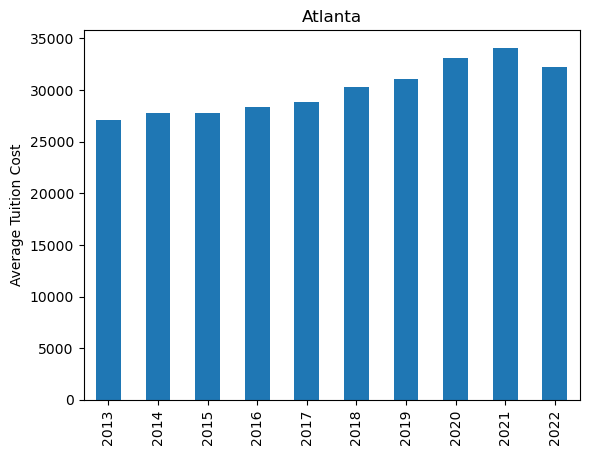

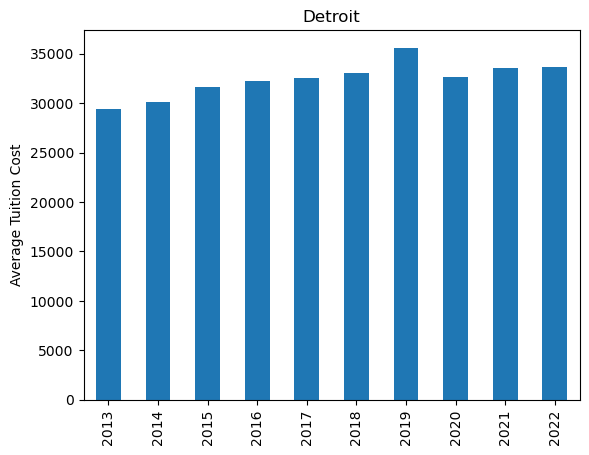

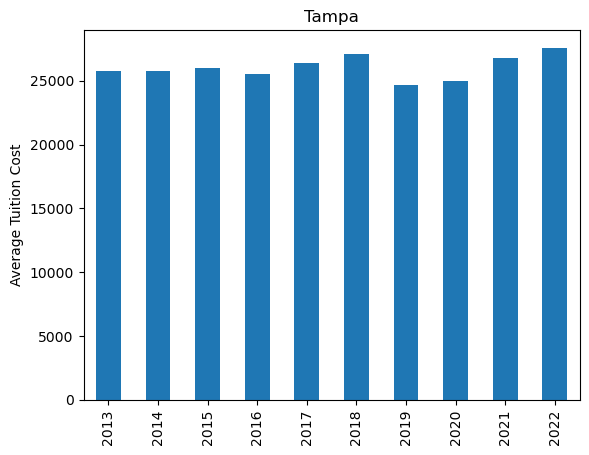

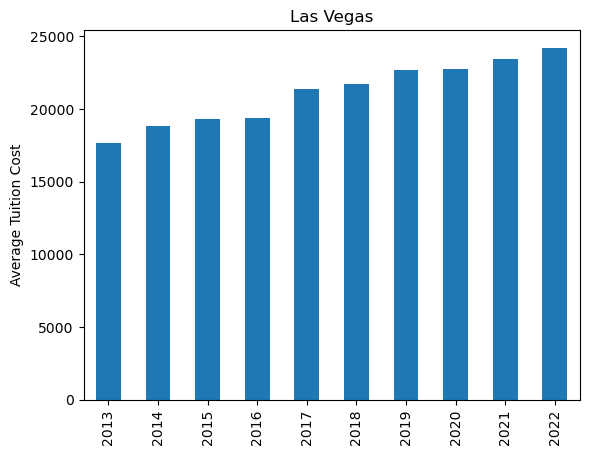

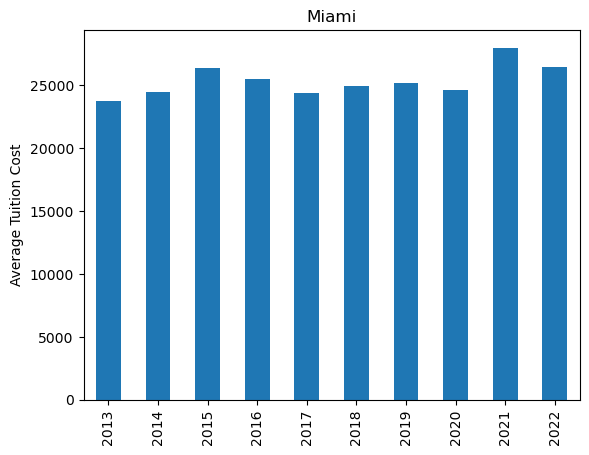

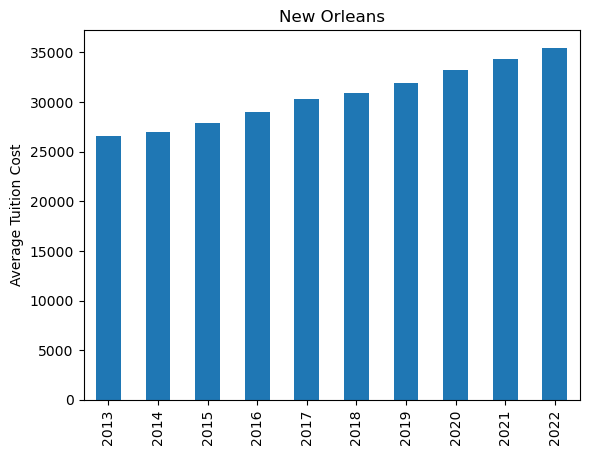

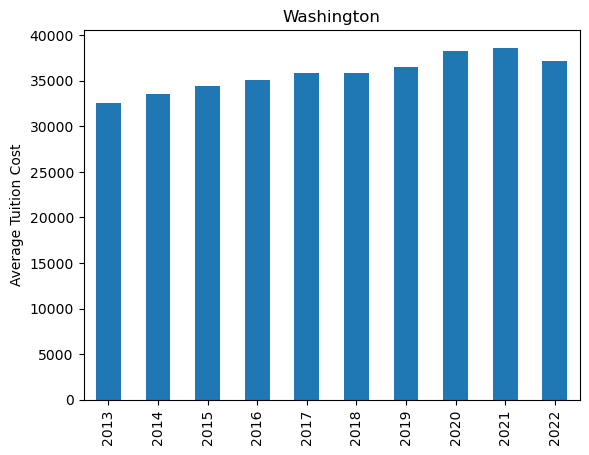

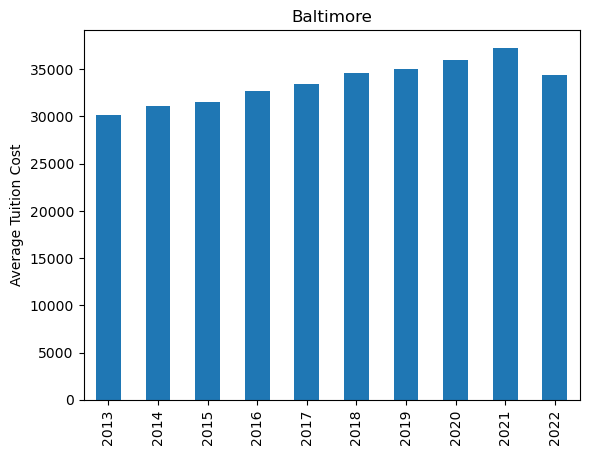

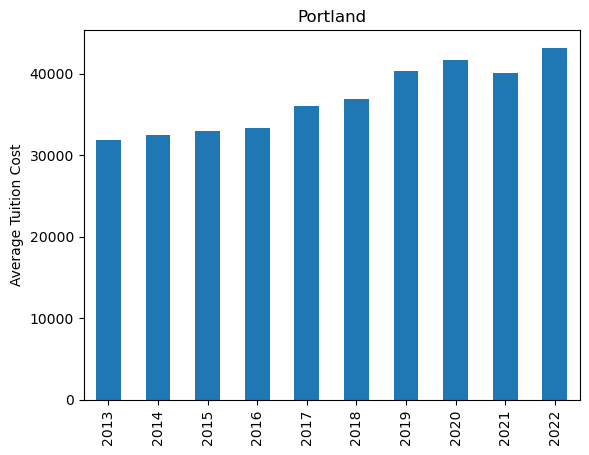

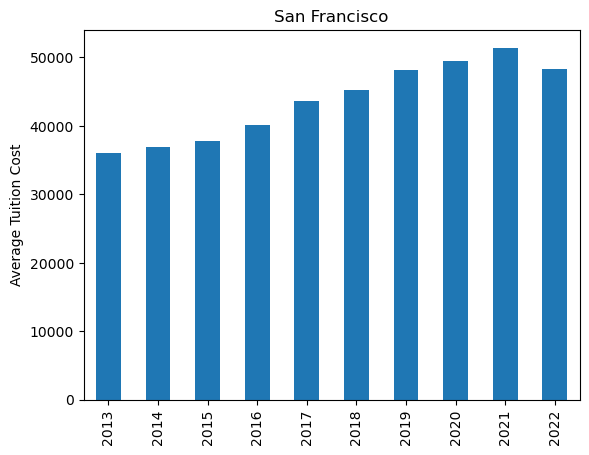

In [100]:
# This for loop goes through each city in the cities list we made earlier and plots a bar graph so we can see the change over 10 years
for city in cities:
    current_college_city = merged_college_cost[[city]].plot(kind="bar", title=city, legend=False, ylabel='Average Tuition Cost')
    plt.show()

As you can see the average cost of College Tuition has gone up in each of the cities we looked into. Though not as much of an increase as we saw in the real estate data set, which would have shown a strong correlation. My conclusion is that the cost of Higher education does seem to have an impact on the cost of homes in their respective cities, even if its only a minor correlation. 

Now I wanted to see if scholastic aptetude has an impact on Home Values in the 10 cities we are looking at. To get some measure of what "scholastic aptetude" can be graphed by, I took the average SAT scores for the colleges in the cities we were looking at and how much they changed over the same 10 years. My assumption is that if scolastic aptetude is going up, that those people would be more inclinde to invest in things like real estate, and that could be a factor in the inflation of home values.

In [18]:
 # read in the data
sat_data21_22 = pd.read_csv("../Resources/data/MERGED2021_22_PP.csv", low_memory=False)

 #only the columns I want for sat averages
sat_data21_22 = sat_data21_22[["INSTNM","CITY","STABBR", "SAT_AVG"]]

# filter out the states
sat_data21_22 = sat_data21_22[sat_data21_22.isin(states).any(axis=1)] 

# filter out the cities
sat_data21_22 = sat_data21_22[sat_data21_22.isin(cities).any(axis=1)]

# take just the city and sat averages
sat_data21_22 = sat_data21_22[["CITY","SAT_AVG"]] 

# drop the columns with "NaN" Las Vegas did not report SAT scors for their state in 2022
sat_data21_22.dropna(how='any')

# sort by city and take the average SAT score for that city
sat_data21_22 = sat_data21_22.groupby(["CITY"]).mean()

# rename the average score column to the year
sat_data21_22 = sat_data21_22.rename(columns={"SAT_AVG":"2022"}) 
display(sat_data21_22)


,2022
CITY,
Atlanta,1235.166667
Baltimore,1098.800000
Detroit,1163.500000
Las Vegas,NaN
Miami,1155.000000
New Orleans,1139.800000
Portland,1243.666667
San Francisco,1305.000000
Tampa,1214.500000


In [19]:
# read in the data
sat_data20_21 = pd.read_csv("../Resources/data/MERGED2020_21_PP.csv", low_memory=False) 

#only the columns I want for sat averages
sat_data20_21 = sat_data20_21[["INSTNM","CITY","STABBR", "SAT_AVG"]] 

# filter out the states
sat_data20_21 = sat_data20_21[sat_data20_21.isin(states).any(axis=1)] 

# filter out the cities
sat_data20_21 = sat_data20_21[sat_data20_21.isin(cities).any(axis=1)] 

# take just the city and sat averages
sat_data20_21 = sat_data20_21[["CITY","SAT_AVG"]] 

# drop the columns with "NaN"
sat_data20_21.dropna(how='any') 

# sort by city and take the average SAT score for that city
sat_data20_21 = sat_data20_21.groupby(["CITY"]).mean() 

# rename the average score column to the year
sat_data20_21 = sat_data20_21.rename(columns={"SAT_AVG":"2021"}) 
display(sat_data20_21)

,2021
CITY,
Atlanta,1229.5
Baltimore,1139.0
Detroit,1138.5
Las Vegas,1124.0
Miami,1190.0
New Orleans,1126.0
Portland,1210.0
San Francisco,1139.0
Tampa,1215.0


In [20]:
# read in the data
sat_data19_20 = pd.read_csv("../Resources/data/MERGED2019_20_PP.csv", low_memory=False)

#only the columns I want for sat averages
sat_data19_20 = sat_data19_20[["INSTNM","CITY","STABBR", "SAT_AVG"]]

# filter out the states
sat_data19_20 = sat_data19_20[sat_data19_20.isin(states).any(axis=1)]

# filter out the cities
sat_data19_20 = sat_data19_20[sat_data19_20.isin(cities).any(axis=1)]

# take just the city and sat averages
sat_data19_20 = sat_data19_20[["CITY","SAT_AVG"]] 

# drop the columns with "NaN" 
sat_data19_20.dropna(how='any') 

# sort by city and take the average SAT score for that city
sat_data19_20 = sat_data19_20.groupby(["CITY"]).mean() 

# rename the average score column to the year
sat_data19_20 = sat_data19_20.rename(columns={"SAT_AVG":"2020"}) 
display(sat_data19_20)

,2020
CITY,
Atlanta,1213.428571
Baltimore,1112.250000
Detroit,1151.000000
Las Vegas,1126.000000
Miami,1103.500000
New Orleans,1148.666667
Portland,1235.600000
San Francisco,1141.000000
Tampa,1228.500000


In [21]:
# read in the data
sat_data18_19 = pd.read_csv("../Resources/data/MERGED2018_19_PP.csv", low_memory=False) 

#only the columns I want for sat averages
sat_data18_19 = sat_data18_19[["INSTNM","CITY","STABBR", "SAT_AVG"]] 

# filter out the states
sat_data18_19 = sat_data18_19[sat_data18_19.isin(states).any(axis=1)] 

# filter out the cities
sat_data18_19 = sat_data18_19[sat_data18_19.isin(cities).any(axis=1)] 

# take just the city and sat averages
sat_data18_19 = sat_data18_19[["CITY","SAT_AVG"]] 

# drop the columns with "NaN" 
sat_data18_19.dropna(how='any') 

# sort by city and take the average SAT score for that city
sat_data18_19 = sat_data18_19.groupby(["CITY"]).mean() 

# rename the average score column to the year
sat_data18_19 = sat_data18_19.rename(columns={"SAT_AVG":"2019"}) 
display(sat_data18_19)

,2019
CITY,
Atlanta,1227.571429
Baltimore,1144.285714
Detroit,1129.000000
Las Vegas,1113.000000
Miami,1104.500000
New Orleans,1162.800000
Portland,1209.750000
San Francisco,1145.500000
Tampa,1165.000000


In [22]:
# read in the data
sat_data17_18 = pd.read_csv("../Resources/data/MERGED2017_18_PP.csv", low_memory=False) 

#only the columns I want for sat averages
sat_data17_18 = sat_data17_18[["INSTNM","CITY","STABBR", "SAT_AVG"]] 

# filter out the states
sat_data17_18 = sat_data17_18[sat_data17_18.isin(states).any(axis=1)] 

# filter out the cities
sat_data17_18 = sat_data17_18[sat_data17_18.isin(cities).any(axis=1)] 

# take just the city and sat averages
sat_data17_18 = sat_data17_18[["CITY","SAT_AVG"]] 

# drop the columns with "NaN" 
sat_data17_18.dropna(how='any') 

# sort by city and take the average SAT score for that city
sat_data17_18 = sat_data17_18.groupby(["CITY"]).mean() 

# rename the average score column to the year
sat_data17_18 = sat_data17_18.rename(columns={"SAT_AVG":"2018"}) 
display(sat_data17_18)

,2018
CITY,
Atlanta,1197.857143
Baltimore,1125.857143
Detroit,1116.750000
Las Vegas,1100.000000
Miami,1071.000000
New Orleans,1118.000000
Portland,1229.800000
San Francisco,1128.500000
Tampa,1208.500000


In [23]:
# read in the data
sat_data16_17 = pd.read_csv("../Resources/data/MERGED2016_17_PP.csv", low_memory=False) 

#only the columns I want for sat averages
sat_data16_17 = sat_data16_17[["INSTNM","CITY","STABBR", "SAT_AVG"]] 

# filter out the states
sat_data16_17 = sat_data16_17[sat_data16_17.isin(states).any(axis=1)] 

# filter out the cities
sat_data16_17 = sat_data16_17[sat_data16_17.isin(cities).any(axis=1)] 

# take just the city and sat averages
sat_data16_17 = sat_data16_17[["CITY","SAT_AVG"]] 

# drop the columns with "NaN" 
sat_data16_17.dropna(how='any') 

# sort by city and take the average SAT score for that city
sat_data16_17 = sat_data16_17.groupby(["CITY"]).mean() 

# rename the average score column to the year
sat_data16_17 = sat_data16_17.rename(columns={"SAT_AVG":"2017"}) 
display(sat_data16_17)

,2017
CITY,
Atlanta,1144.142857
Baltimore,1078.428571
Detroit,1027.500000
Las Vegas,1012.000000
Miami,1030.000000
New Orleans,1047.142857
Portland,1176.800000
San Francisco,1064.500000
Tampa,1134.500000


In [24]:
# read in the data
sat_data15_16 = pd.read_csv("../Resources/data/MERGED2015_16_PP.csv", low_memory=False) 

#only the columns I want for sat averages
sat_data15_16 = sat_data15_16[["INSTNM","CITY","STABBR", "SAT_AVG"]] 

# filter out the states
sat_data15_16 = sat_data15_16[sat_data15_16.isin(states).any(axis=1)] 

# filter out the cities
sat_data15_16 = sat_data15_16[sat_data15_16.isin(cities).any(axis=1)] 

# take just the city and sat averages
sat_data15_16 = sat_data15_16[["CITY","SAT_AVG"]] 

# drop the columns with "NaN" 
sat_data15_16.dropna(how='any') 

# sort by city and take the average SAT score for that city
sat_data15_16 = sat_data15_16.groupby(["CITY"]).mean() 

# rename the average score column to the year
sat_data15_16 = sat_data15_16.rename(columns={"SAT_AVG":"2016"}) 
display(sat_data15_16)

,2016
CITY,
Atlanta,1117.428571
Baltimore,1089.571429
Detroit,1010.500000
Las Vegas,1007.000000
Miami,1008.000000
New Orleans,1042.500000
Portland,1153.000000
San Francisco,1075.500000
Tampa,1134.500000


In [26]:
# read in the data
sat_data14_15 = pd.read_csv("../Resources/data/MERGED2014_15_PP.csv", low_memory=False) 

#only the columns I want for sat averages
sat_data14_15 = sat_data14_15[["INSTNM","CITY","STABBR", "SAT_AVG"]] 

# filter out the states
sat_data14_15 = sat_data14_15[sat_data14_15.isin(states).any(axis=1)] 

# filter out the cities
sat_data14_15 = sat_data14_15[sat_data14_15.isin(cities).any(axis=1)] 

# take just the city and sat averages
sat_data14_15 = sat_data14_15[["CITY","SAT_AVG"]] 

# drop the columns with "NaN" 
sat_data14_15.dropna(how='any') 

# sort by city and take the average SAT score for that city
sat_data14_15 = sat_data14_15.groupby(["CITY"]).mean() 

# rename the average score column to the year
sat_data14_15 = sat_data14_15.rename(columns={"SAT_AVG":"2015"}) 
display(sat_data14_15)

,2015
CITY,
Atlanta,1118.428571
Baltimore,1077.000000
Detroit,997.500000
Las Vegas,1000.000000
Miami,1013.500000
New Orleans,1048.333333
Portland,1138.400000
San Francisco,1071.000000
Tampa,1128.000000


In [27]:
# read in the data
sat_data13_14 = pd.read_csv("../Resources/data/MERGED2013_14_PP.csv", low_memory=False) 

#only the columns I want for sat averages
sat_data13_14 = sat_data13_14[["INSTNM","CITY","STABBR", "SAT_AVG"]] 

# filter out the states
sat_data13_14 = sat_data13_14[sat_data13_14.isin(states).any(axis=1)] 

# filter out the cities
sat_data13_14 = sat_data13_14[sat_data13_14.isin(cities).any(axis=1)] 

# take just the city and sat averages
sat_data13_14 = sat_data13_14[["CITY","SAT_AVG"]] 

# drop the columns with "NaN"
sat_data13_14.dropna(how='any')

# sort by city and take the average SAT score for that city
sat_data13_14 = sat_data13_14.groupby(["CITY"]).mean()  

# rename the average score column to the year
sat_data13_14 = sat_data13_14.rename(columns={"SAT_AVG":"2014"}) 
display(sat_data13_14)

,2014
CITY,
Atlanta,1114.285714
Baltimore,1093.125000
Detroit,995.500000
Las Vegas,1003.000000
Miami,1013.000000
New Orleans,1049.333333
Portland,1164.500000
San Francisco,1073.333333
Tampa,1121.500000


In [28]:
# read in the data
sat_data12_13 = pd.read_csv("../Resources/data/MERGED2012_13_PP.csv", low_memory=False) 

#only the columns I want for sat averages
sat_data12_13 = sat_data12_13[["INSTNM","CITY","STABBR", "SAT_AVG"]] 

# filter out the states
sat_data12_13 = sat_data12_13[sat_data12_13.isin(states).any(axis=1)] 

# filter out the cities
sat_data12_13 = sat_data12_13[sat_data12_13.isin(cities).any(axis=1)] 

# take just the city and sat averages
sat_data12_13 = sat_data12_13[["CITY","SAT_AVG"]] 

# drop the columns with "NaN" 
sat_data12_13.dropna(how='any') 

# sort by city and take the average SAT score for that city
sat_data12_13 = sat_data12_13.groupby(["CITY"]).mean() 

# rename the average score column to the year
sat_data12_13 = sat_data12_13.rename(columns={"SAT_AVG":"2013"}) 
display(sat_data12_13)

,2013
CITY,
Atlanta,1125.000000
Baltimore,1091.750000
Detroit,1022.400000
Las Vegas,993.000000
Miami,1038.500000
New Orleans,1052.833333
Portland,1110.833333
San Francisco,1057.750000
Tampa,1126.500000


In [102]:
# Concating all the files together to make a sigle data set
merged_avg_sat = pd.concat([sat_data12_13, sat_data13_14, sat_data14_15, sat_data15_16, sat_data16_17, sat_data17_18, sat_data18_19, sat_data19_20, sat_data20_21, sat_data21_22], axis="columns", join="inner")
merged_avg_sat.head(10)

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
CITY,,,,,,,,,,
Atlanta,1125.000000,1114.285714,1118.428571,1117.428571,1144.142857,1197.857143,1227.571429,1213.428571,1229.5,1235.166667
Baltimore,1091.750000,1093.125000,1077.000000,1089.571429,1078.428571,1125.857143,1144.285714,1112.250000,1139.0,1098.800000
Detroit,1022.400000,995.500000,997.500000,1010.500000,1027.500000,1116.750000,1129.000000,1151.000000,1138.5,1163.500000
Las Vegas,993.000000,1003.000000,1000.000000,1007.000000,1012.000000,1100.000000,1113.000000,1126.000000,1124.0,NaN
Miami,1038.500000,1013.000000,1013.500000,1008.000000,1030.000000,1071.000000,1104.500000,1103.500000,1190.0,1155.000000
New Orleans,1052.833333,1049.333333,1048.333333,1042.500000,1047.142857,1118.000000,1162.800000,1148.666667,1126.0,1139.800000
Portland,1110.833333,1164.500000,1138.400000,1153.000000,1176.800000,1229.800000,1209.750000,1235.600000,1210.0,1243.666667
San Francisco,1057.750000,1073.333333,1071.000000,1075.500000,1064.500000,1128.500000,1145.500000,1141.000000,1139.0,1305.000000
Tampa,1126.500000,1121.500000,1128.000000,1134.500000,1134.500000,1208.500000,1165.000000,1228.500000,1215.0,1214.500000


In [103]:
# Swaping the rows and columns
merged_avg_sat = merged_avg_sat.transpose() 
merged_avg_sat.head(10)

CITY,Atlanta,Baltimore,Detroit,Las Vegas,Miami,New Orleans,Portland,San Francisco,Tampa,Washington
2013,1125.000000,1091.750000,1022.40,993.0,1038.5,1052.833333,1110.833333,1057.750000,1126.5,1165.833333
2014,1114.285714,1093.125000,995.50,1003.0,1013.0,1049.333333,1164.500000,1073.333333,1121.5,1165.500000
2015,1118.428571,1077.000000,997.50,1000.0,1013.5,1048.333333,1138.400000,1071.000000,1128.0,1174.500000
2016,1117.428571,1089.571429,1010.50,1007.0,1008.0,1042.500000,1153.000000,1075.500000,1134.5,1190.000000
2017,1144.142857,1078.428571,1027.50,1012.0,1030.0,1047.142857,1176.800000,1064.500000,1134.5,1190.600000
2018,1197.857143,1125.857143,1116.75,1100.0,1071.0,1118.000000,1229.800000,1128.500000,1208.5,1249.600000
2019,1227.571429,1144.285714,1129.00,1113.0,1104.5,1162.800000,1209.750000,1145.500000,1165.0,1264.200000
2020,1213.428571,1112.250000,1151.00,1126.0,1103.5,1148.666667,1235.600000,1141.000000,1228.5,1262.000000
2021,1229.500000,1139.000000,1138.50,1124.0,1190.0,1126.000000,1210.000000,1139.000000,1215.0,1256.400000
2022,1235.166667,1098.800000,1163.50,NaN,1155.0,1139.800000,1243.666667,1305.000000,1214.5,1282.000000


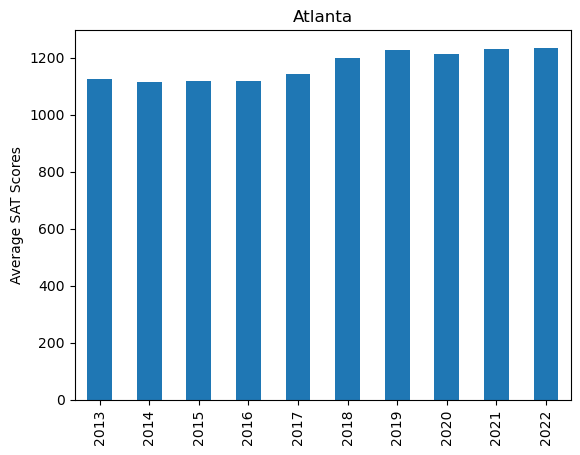

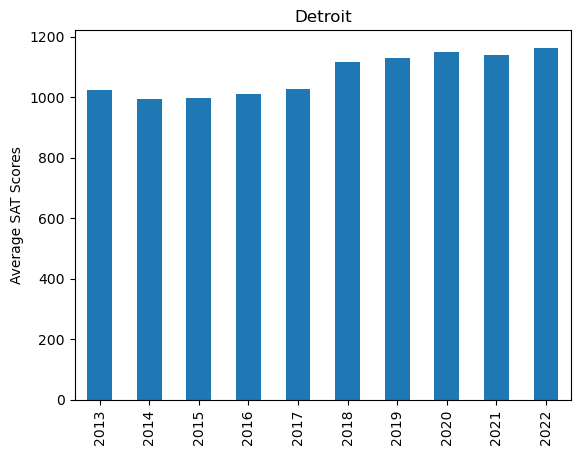

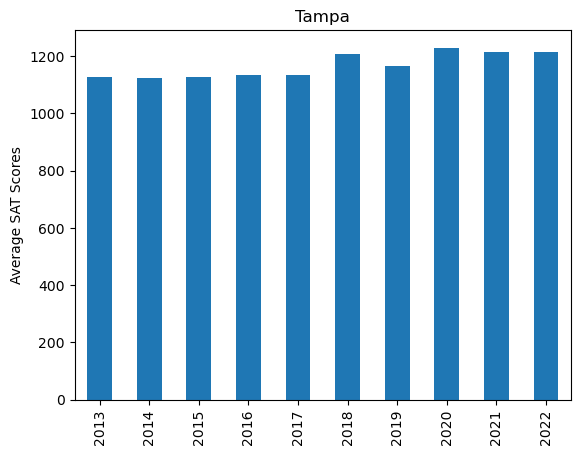

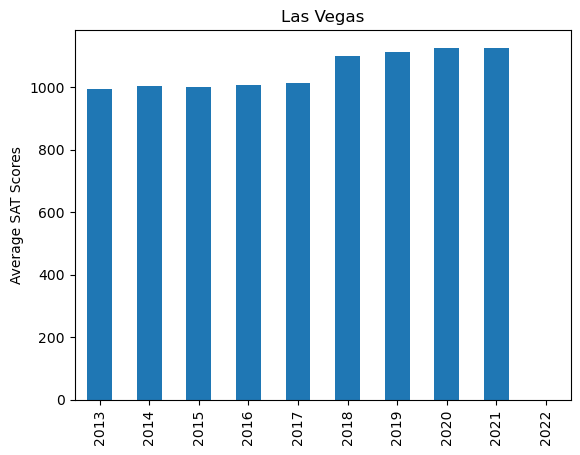

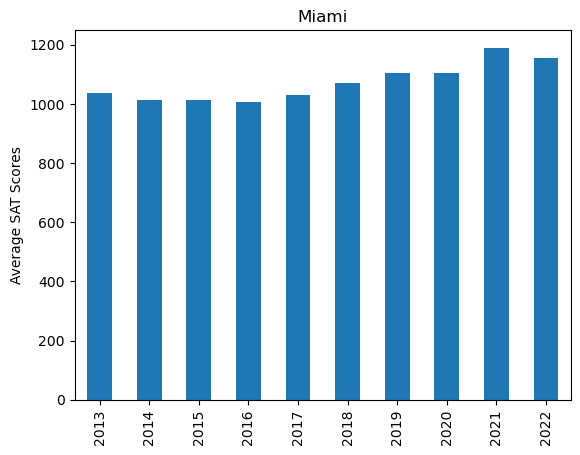

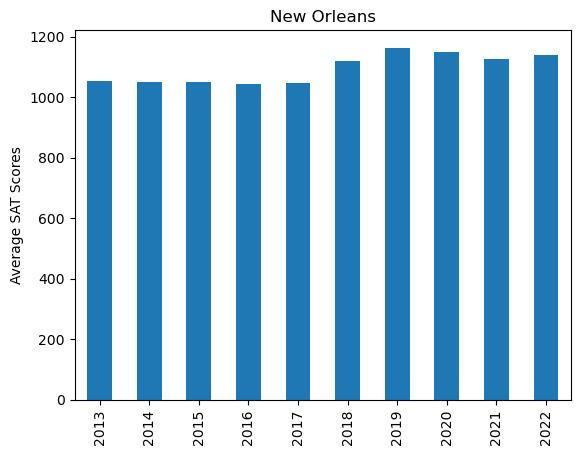

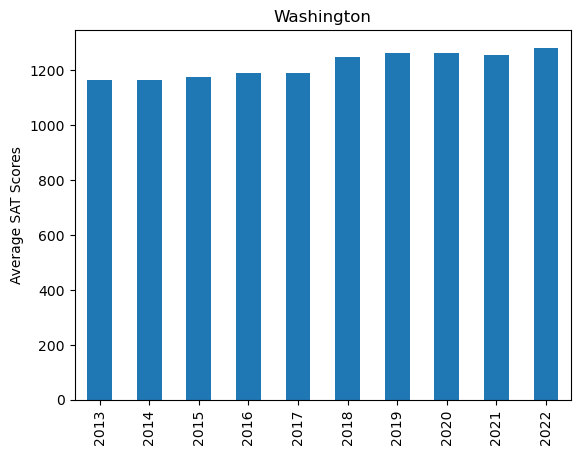

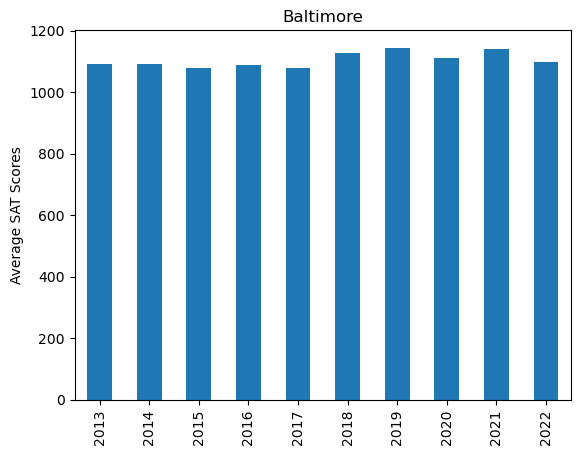

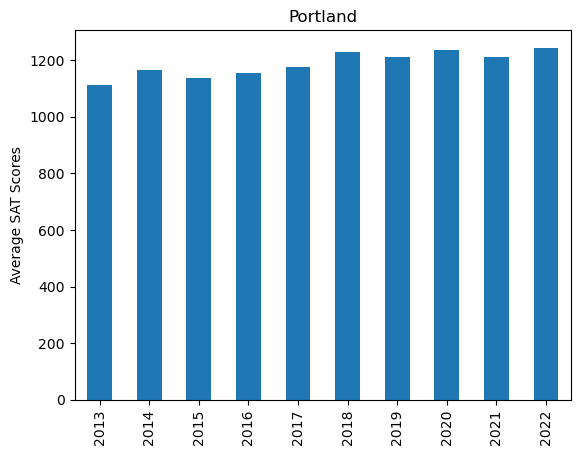

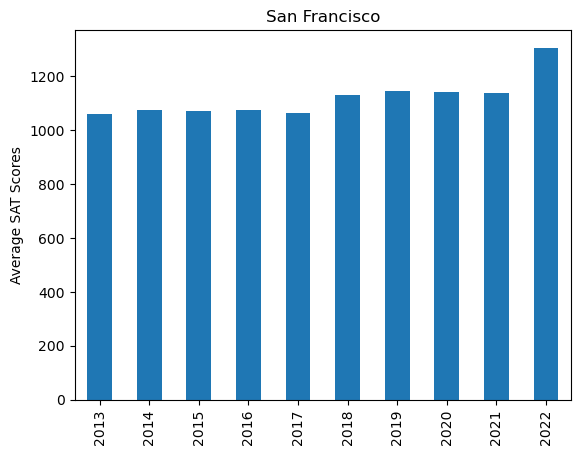

In [104]:
# this loop plots a bar graph for each city to show the trending patterns we saw
for city in cities:
    current_sat_college_city = merged_avg_sat[[city]].plot(kind="bar", title=city, legend=False, ylabel='Average SAT Scores')
    plt.show()

What I found is that in every city beside Baltimore, there is a noticable increase in the scholastic aptitude reflected in average SAT scores over the last 10 years. Higher performing home buyers might be a contributing factor in the increase in home values base on this analysis.

Now I wanted to ask the question: Is the printing of money increasing real estate prices? My assumption is that if money is being printed at the same rate housing prices are going up that there is correlation between the printing of money itself and the increase in home values. For this I gathered the annual production reports, totaled them, and graphed them over the same 10 year span.

In [35]:
# building the html
url = 'https://www.bep.gov/currency/production-figures/annual-production-reports'

# read in the us currency html data
money = pd.read_html(url)
money

[  Denomination       FY 2020       FY 2021     FY 2022     FY 2023
 0           $1  1.574400e+09  6.863200e+08   918560000  2397104000
 1           $2           NaN           NaN   108352000   128000000
 2           $5  4.672000e+08  1.627520e+08   525456000   881520000
 3          $10  4.608000e+08  2.880000e+08   281600000   480000000
 4          $20  1.721600e+09  2.994656e+09  1711136000   261936000
 5          $50  2.368000e+08  4.768000e+08   756096000   267840000
 6         $100  1.334400e+09  2.378304e+09  2125536000  1326976000,
   Denomination     FY 2015     FY 2016       FY 2017       FY 2018     FY 2019
 0           $1  2451200000  2425600000  2.425600e+09  2.163200e+09  2137600000
 1           $2    32000000   179200000           NaN           NaN   160000000
 2           $5   755200000   819200000  9.152000e+08  8.256000e+08   736000000
 3          $10   627000000   480000000  2.624000e+08  5.696000e+08   339200000
 4          $20  1868800000  1939200000  1.715200e+09  

In [71]:
# the read html produced a list of dataframes
# creating a dataframe using the first datafram in the list
combined_df = money[0] 
for df in money[1:3]:
    # merging 3 dataframes together
    combined_df = pd.merge(combined_df, df, on='Denomination', how='inner')
# just the columns I want
money_df = combined_df[["FY 2012", "FY 2013", "FY 2014", "FY 2015", "FY 2016", "FY 2017", "FY 2018", "FY 2019", "FY 2020", "FY 2021", "FY 2022"]]
for i in range(2010,2024):
    money_df = money_df.rename(columns={f"FY {i}":f"{i}"})
money_df

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,2022400000,1.792000e+09,2278400000,2451200000,2425600000,2.425600e+09,2.163200e+09,2137600000,1.574400e+09,6.863200e+08,918560000
1,134400000,NaN,32000000,32000000,179200000,NaN,NaN,160000000,NaN,NaN,108352000
2,729600000,4.800000e+08,563200000,755200000,819200000,9.152000e+08,8.256000e+08,736000000,4.672000e+08,1.627520e+08,525456000
3,652800000,3.136000e+08,486400000,627000000,480000000,2.624000e+08,5.696000e+08,339200000,4.608000e+08,2.880000e+08,281600000
4,1568000000,5.184000e+08,1785600000,1868800000,1939200000,1.715200e+09,1.862400e+09,1356800000,1.721600e+09,2.994656e+09,1711136000
5,246400000,2.464000e+08,220800000,220800000,224000000,2.688000e+08,3.648000e+08,224000000,2.368000e+08,4.768000e+08,756096000
6,3027200000,4.428800e+09,640000000,1078400000,1516800000,1.516800e+09,1.753600e+09,1484800000,1.334400e+09,2.378304e+09,2125536000


<Axes: title={'center': 'Money Printed Each Year in Billions'}>

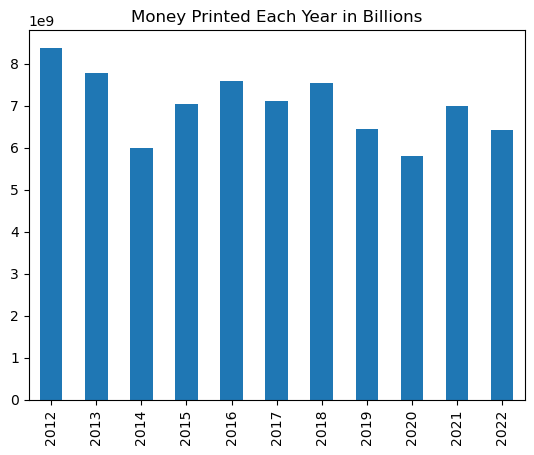

In [84]:
# Adding up the columns
printed_money_totals_df = money_df.sum()

# printing a graph
printed_money_totals_df.plot(kind='bar', title='Money Printed Each Year in Billions')

The graph shows that despite popular opinion that printing money is the major cause of inflation, we have actually been printing less more per year as a general trend. Not to beleive just one ten year span I took the data from the previous 10 years as well.

<Axes: title={'center': 'Money Printed Each Year in Billions'}>

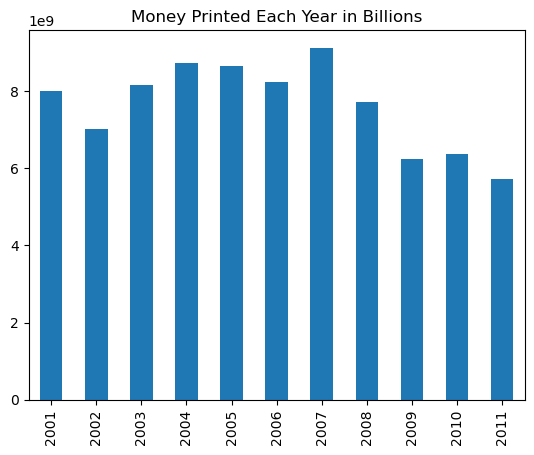

In [85]:
# new dataframe to show the previous 10 years
previous_df = money[2]
for df in money[3:5]:
    # merging 3 dataframes together
    previous_df = pd.merge(previous_df, df, on='Denomination', how='inner')

# only the columns I want from the previous 10 years
previous_df = previous_df[["FY 2001", "FY 2002", "FY 2003", "FY 2004", "FY 2005", "FY 2006", "FY 2007", "FY 2008", "FY 2009", "FY 2010", "FY 2011"]]

# Removing "FY" from the start of each year
for i in range(2001,2012):
    previous_df = previous_df.rename(columns={f"FY {i}":f"{i}"})

# Adding up the columns
printed_money_totals_df2 = previous_df.sum()

# printing a graph
printed_money_totals_df2.plot(kind='bar', title='Money Printed Each Year in Billions')

Even the previous 10 years show a steady decline in the printing of money. These graphs do not show the impact of quantitative easing. Just that printing money by itself is in decline.

To make a better apples to apples compairison I then converted the graphs to their respective z-score values to get a better idea of what might actually be related. This, unfortunately, made the results even more inconclusive.

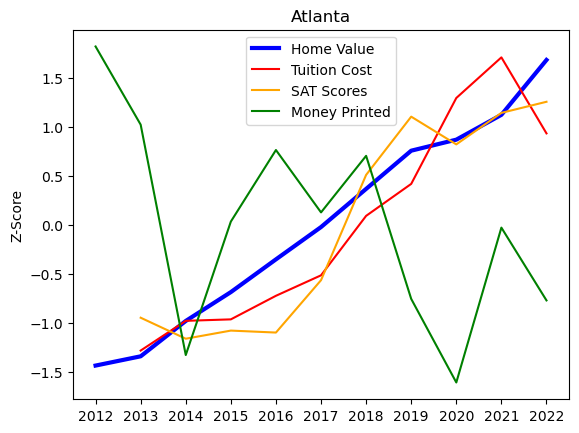

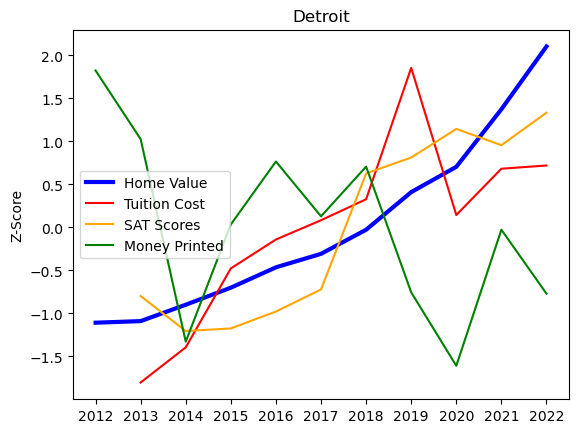

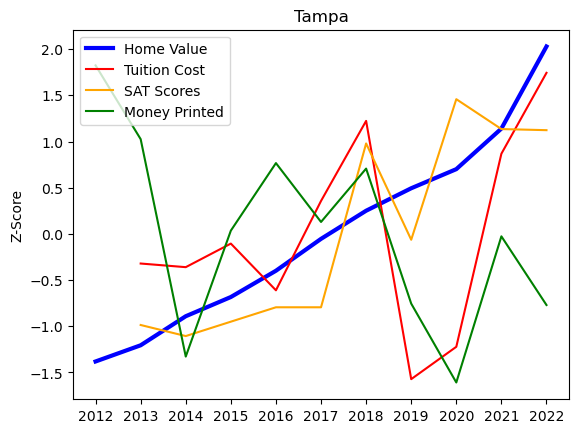

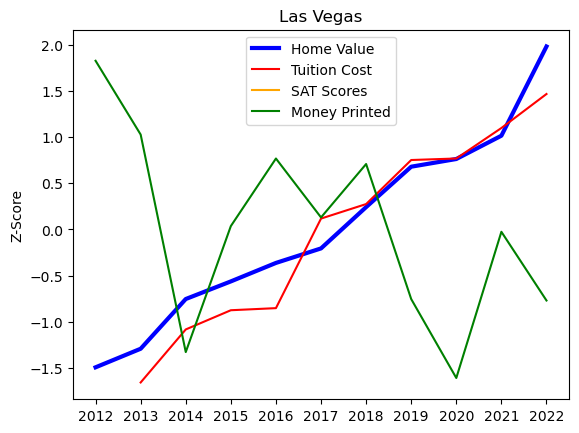

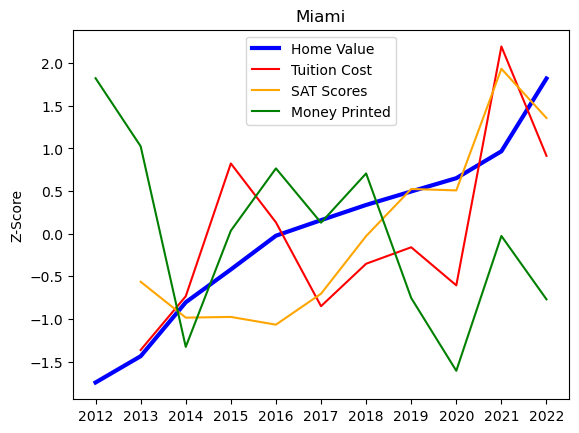

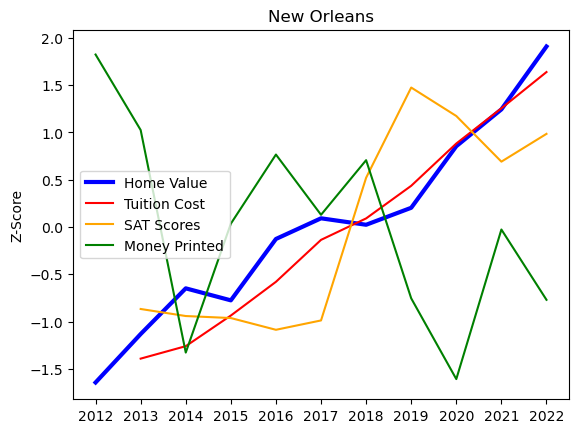

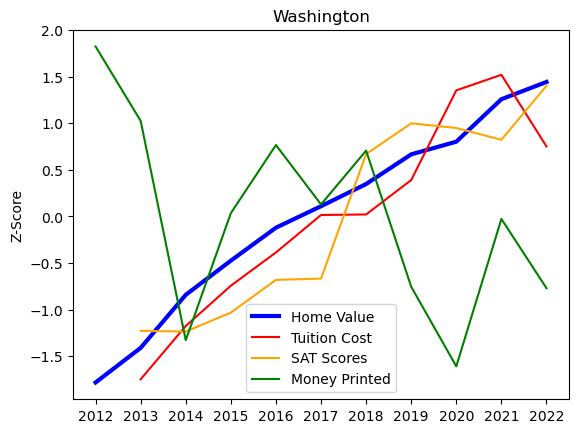

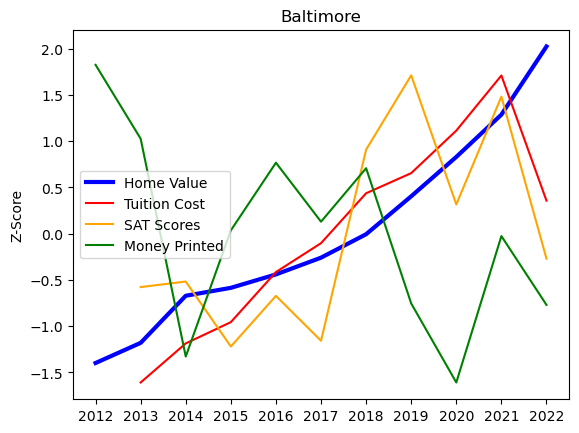

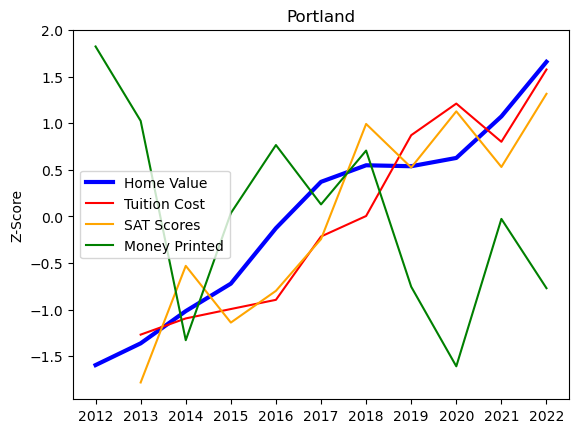

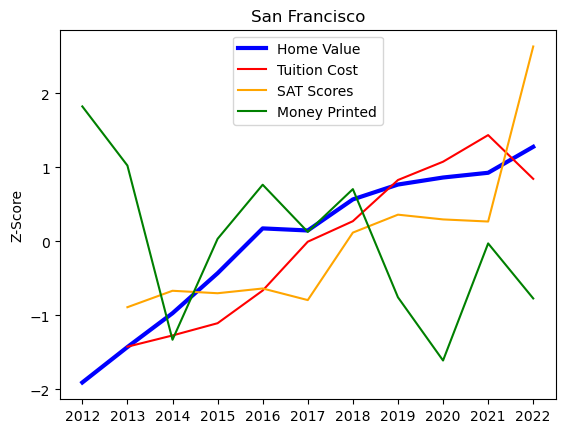

In [136]:
for city in cities:
    homes=st.zscore(real_estate_prices_plot[[city]]) #setting a variable for home values
    college=st.zscore(merged_college_cost[[city]]) #setting a variable for Tuition costs
    sat=st.zscore(merged_avg_sat[[city]]) #setting a variable for SAT scores
    money=st.zscore(printed_money_totals_df) #setting a variable for money printed
    plt.plot(homes, color='blue', label="Home Value", linewidth=3) # adding the home value and making the line bold
    plt.plot(college, color='red', label="Tuition Cost") # adding the Tuition cost
    plt.plot(sat, color='orange', label="SAT Scores") # Adding the SAT scores
    plt.plot(money, color='green', label="Money Printed") # Adding the money printing report
    plt.title(city) # adding the tital from the cities list
    plt.legend() # adding a legend for clarity
    plt.ylabel("Z-Score")
    plt.show()

As you can see, while some values rise over time, nothing matches the consistant rise of housing prices. 

Summary: While some of the factors I researched show a rise over the same period of time like tuition costs and SAT scores, nothing compairs to the sheer consistancy of the rise of housing prices. The printing of money may be a hot topic of debate when it comes to the cause of inflation, but the production reports don't seem to indicate that it's actually related to the rise in home values at all. Even those statistics that show a similar rise over time, don't do so following the same pattern as the rise of real estate prices. Which leads me to conclude that they are a minor correlation at best. The implications of this is that there is no "one thing" that can be blamed for the rise in housing prices over the years, and it's likely to be a combination of the many things that we researched in this project, looking for an answer.